# Overfitting 방지 실습

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 네트워크 구조 정의

In [2]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5)
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h)
        return self.dense5(h)

## 데이터 불러오기

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

(60000, 28, 28) (10000, 28, 28)


## 모델 생성

In [4]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Early Stopping Callback

In [5]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

## 모델 학습

In [6]:
EPOCHS = 50

# 32 * 1875 = 60,000

history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Train for 1875 steps, validate for 313 steps
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5802 - accuracy: 0.7977 - val_loss: 0.4620 - val_accuracy: 0.8278
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4179 - accuracy: 0.8525 - val_loss: 0.4201 - val_accuracy: 0.8539
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8648 - val_loss: 0.3964 - val_accuracy: 0.8574
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3584 - accuracy: 0.8697 - val_loss: 0.3625 - val_accuracy: 0.8648
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3362 - accuracy: 0.8775 - val_loss: 0.3909 - val_accuracy: 0.8573
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.8821 - val_loss: 0.3511 - val_accuracy: 0.8762
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3107 - accura

## Loss 시각화

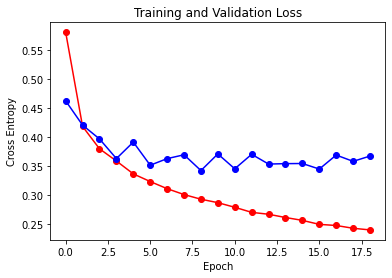

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()